# Football Data Analysis
Football is a global, popular, and dynamic sport with many different factors that can influence the outcome of a match. By analyzing large datasets of football data, teams can gain a deeper understanding of factors that contribute to players' success, enabling coaches, scouts, and analysts to make informed decisions.

Football data analysis is the process of collecting, cleaning, and analyzing data to extract meaningful insights. The valuable insights extracted from this analysis can be used to improve player performance, team tactics, fan engagement, and overall decision-making.

# Sprint 2
- Generating business objectives aligned with each focus area mentioned previously.
- Generating busniess question according to the business objctives.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('football_data.csv')
data.head()

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman


-------------------------------------------------------------------------------------------------------------------------------------------------------
# 1. Performance Analysis
Questions:
- Which players have the highest average number of assists per game?
- Which players consistently perform well across competitions based on goals, assists?

## Which players have the highest average number of assists per game?

In [3]:
# Players with the highest average number of assists per game
avg_assists = data.groupby('player_name_x')['assists'].mean().sort_values(ascending=False)

In [4]:
print(avg_assists.head())

player_name_x
Luca de la Torre     0.500000
Joseph Efford        0.428571
Michael Parkhurst    0.280000
Juan Agudelo         0.214286
Christian Pulisic    0.187135
Name: assists, dtype: float64


### Interpretation:
The players who are consistent in assisting goals during their games. The higher the average, the more impactful the player is in creating scoring opportunities.

## Which players consistently perform well across competitions based on goals, assists?

In [5]:
# Calculate Goals + Assists
data['goals+assists'] = (data['goals'] + data['assists'])

# Sort players by performance
player_p = data.sort_values(by="goals+assists", ascending=False)[:5]

In [6]:
print(player_p)

       appearance_id    game_id  player_id               date_x  \
1873  2224542_119169  2224542.0     119169  2012-08-27 00:00:00   
1875  2224542_119169  2224542.0     119169  2012-08-27 00:00:00   
1872  2224542_119169  2224542.0     119169  2012-08-27 00:00:00   
1871  2224542_119169  2224542.0     119169  2012-08-27 00:00:00   
841    2250210_39378  2250210.0      39378  2012-09-16 00:00:00   

        player_name_x competition_id_x  yellow_cards  red_cards  goals  \
1873  Aron Johannsson              DK1           0.0        0.0    4.0   
1875  Aron Johannsson              DK1           0.0        0.0    4.0   
1872  Aron Johannsson              DK1           0.0        0.0    4.0   
1871  Aron Johannsson              DK1           0.0        0.0    4.0   
841     Jozy Altidore              NL1           0.0        0.0    3.0   

      assists  ...  date_of_birth    sub_position position_y   foot  \
1873      0.0  ...     1990-11-10  Centre-Forward     Attack  right   
1875      

### Interpretation:
- The top 5 players consistently perform well across competitions based on goals, assists

-------------------------------------------------------------------------------------------------------------------------------------------------------
# 2. Player Profile and Market Value
Questions:
- Who are the top 5 players with the highest market value?
- How do market values of players vary across different competitions?

## Which player position attributes are most strongly associated with higher market value?
(e.g., position, or nationality, age) 

In [8]:
# Top 5 players with the highest market value
top_market_value = data[['player_name_x', 'market_value_in_eur']].sort_values(by='market_value_in_eur', ascending=False)
print(top_market_value.head(5))

          player_name_x  market_value_in_eur
4370     Fabian Johnson           30000000.0
3294  Christian Pulisic           25000000.0
3282  Christian Pulisic           25000000.0
3289  Christian Pulisic           25000000.0
3288  Christian Pulisic           25000000.0


### Interpretation: 
- Highlights the most financially valuable players, useful for transfer or sponsorship decisions.

## How do market values of players vary across different competitions?

In [15]:
# Group by competition and calculate average market value
competition_market = data.groupby('competition_type')['market_value_in_eur'].mean().sort_values(ascending=False)
print(competition_market)

competition_type
other                1.134444e+07
international_cup    5.232022e+06
domestic_league      4.304783e+06
domestic_cup         4.022037e+06
Name: market_value_in_eur, dtype: float64


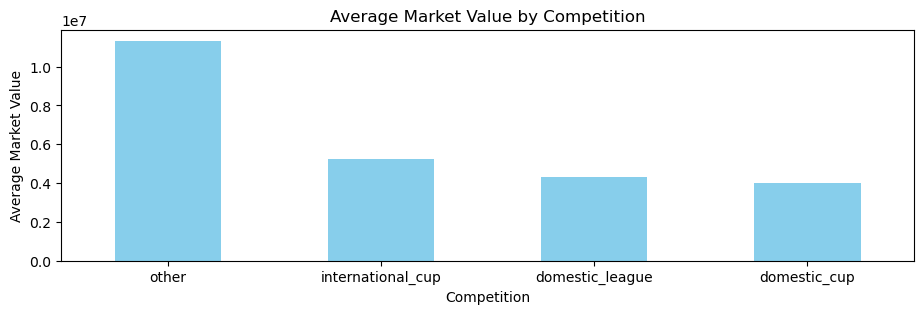

In [32]:
import matplotlib.pyplot as plt
competition_market.plot(kind='bar', figsize=(11, 3), color='skyblue')
plt.title('Average Market Value by Competition')
plt.xlabel('Competition')
plt.ylabel('Average Market Value')
plt.xticks(rotation=0)
plt.show()

### Interpretation:
- The Average market values of players vary across different competitions such as (International_cup, Domestic_league, Domestic_cup)

-------------------------------------------------------------------------------------------------------------------------------------------------------
# 3. Team Comparison
Questions:

- Which player has the highest goals per game?
- How do team performances compare in terms of goals scored?

## Which player has the highest goals per game?

In [13]:
# Team with the highest goals
team_goals = data.groupby('player_name_x')['goals'].sum().sort_values(ascending=False)
print(team_goals.head(5))

player_name_x
Aron Johannsson      119.0
Jozy Altidore         70.0
Christian Pulisic     46.0
Fabian Johnson        28.0
Bobby Wood            26.0
Name: goals, dtype: float64


### Interpretation:
- This helps identify the most effective player offensively.

## How do team performances compare in terms of goals scored?

In [22]:
# Group by team and competition and calculate total goals
team_performance = data.groupby(['competition_type'])['goals'].sum().reset_index()

In [23]:
# Sort the data to compare top and bottom performing teams
team_performance_sort = team_performance.sort_values(by='goals', ascending=False)
print(team_performance_sort.head())

    competition_type  goals
1    domestic_league  426.0
0       domestic_cup   83.0
2  international_cup   28.0
3              other    4.0


### Interpretation: 
- The team performances compare in terms of goals scored and competition types such as (In Domestic League player have scored highest goals of 426)

-------------------------------------------------------------------------------------------------------------------------------------------------------
# 4. Attendance and Stadium Analysis
Question:

- Which stadiums have the highest average attendance?
- How does the average attendance at matches vary by team?

## Which stadiums have the highest average attendance?

In [14]:
# Top stadiums by average attendance
stadium_attendance = data.groupby('stadium')['attendance'].mean().sort_values(ascending=False)
print(stadium_attendance.head(5))

stadium
Old Trafford             75112.100000
Santiago Bernabeu        67739.000000
Allianz Arena            66546.078125
Spotify Camp Nou         61768.500000
Civitas Metropolitano    61023.000000
Name: attendance, dtype: float64


### Interpretation:
- Insights into stadium popularity and fan engagement.

## How does the average attendance at matches vary by team captin?

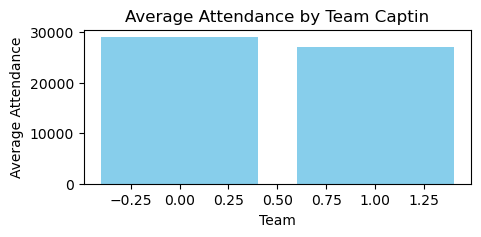

In [33]:
avg_att_by_team = data.groupby('team_captain')['attendance'].mean()
plt.figure(figsize=(5,2))
plt.bar(avg_att_by_team.index,avg_att_by_team.values,color='skyblue')
plt.title('Average Attendance by Team Captin')
plt.xlabel('Team')
plt.ylabel('Average Attendance')
plt.show()

### Interpretation
- This analysis reveals which teams captain attract more fans, indicating marketability and fan engagement.

-------------------------------------------------------------------------------------------------------------------------------------------------------
# 5. Referee Analysis
Question: 
- Which referees issue the most yellow and red cards?
- What is the average number of cards issued per match by different referees?

## Which referees issue the most yellow and red cards?

In [45]:
# Yellow and red cards per referee
referee_cards = data.groupby('referee')[['yellow_cards', 'red_cards']].sum()
print(referee_cards.sort_values(by='yellow_cards', ascending=False).head())

                 yellow_cards  red_cards
referee                                 
Dr. Felix Brych          14.0        0.0
Guido Winkmann           13.0        0.0
Felix Zwayer             13.0        1.0
Tobias Stieler           10.0        1.0
Bjorn Kuipers            10.0        0.0


### Interpretion:
- Identifies strict referees and their tendencies in decision-making.

## What is the average number of cards issued per match by different referees?

In [47]:
# Yellow and red cards per referee
referee_cards = data.groupby('referee')[['yellow_cards', 'red_cards']].mean()
print(referee_cards.sort_values(by='yellow_cards', ascending=False).head())

                 yellow_cards  red_cards
referee                                 
Cuneyt Cakır             1.25        0.0
Marcin Borski            1.00        0.0
Willy Delajod            1.00        0.0
Ilker Meral              1.00        0.0
Huseyin Sabancı          1.00        0.0


### Interpretation:
- Identifies average number of cards issued by referees is yellow card

-------------------------------------------------------------------------------------------------------------------------------------------------------
# 6. Substitution Patterns
Question:
- What are the most common substitution minutes?
- How do substitutions influence match outcomes?

## What are the most common substitution minutes?

In [49]:
# Most common substitution minutes
substitution_minutes = data['minute'].value_counts()
print(substitution_minutes.head(5))

minute
69.0    2840
90.0     110
46.0      89
84.0      53
74.0      52
Name: count, dtype: int64


### Interpretation:
- This helps to understand substitution timing trends.

## How do substitutions influence match outcomes?

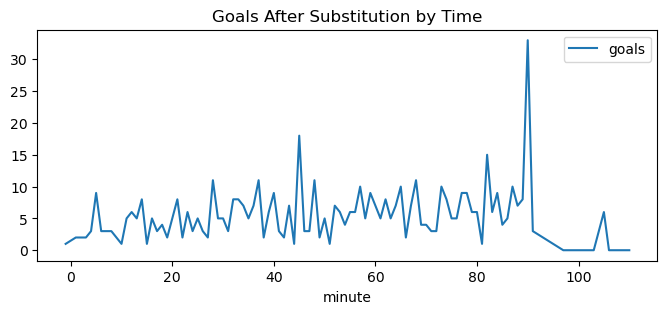

In [76]:
substitution_analysis = data.groupby('minute').agg({'goals': 'sum', 'assists': 'count'}).reset_index()

fig, ax = plt.subplots(figsize=(8, 3))
substitution_analysis.plot(x='minute', y='goals', kind='line', title='Goals After Substitution by Time', ax=ax)
plt.show()

### Interpretation:
- This shows relationship between the timing of substitutions and goals scored in the match.

-------------------------------------------------------------------------------------------------------------------------------------------------------
# 7. Event Analysis

Question: 
- What is the distribution of event (eg. goals, fouls, cards) types during games?
- How do event frequencies differ across seasons?

## What is the distribution of event types during games?

In [79]:
# Distribution of event types
event_distribution = data['type_x'].value_counts()
print(event_distribution)

type_x
Substitutions    3961
Goals             509
Cards             184
Name: count, dtype: int64


### Interpretation:
- This shows the frequency of different game events.

##  How do event frequencies differ across seasons?

In [103]:
# Grouping data by competition and event type to calculate event frequencies
event_season = data.groupby(['season', 'type_x']).size()

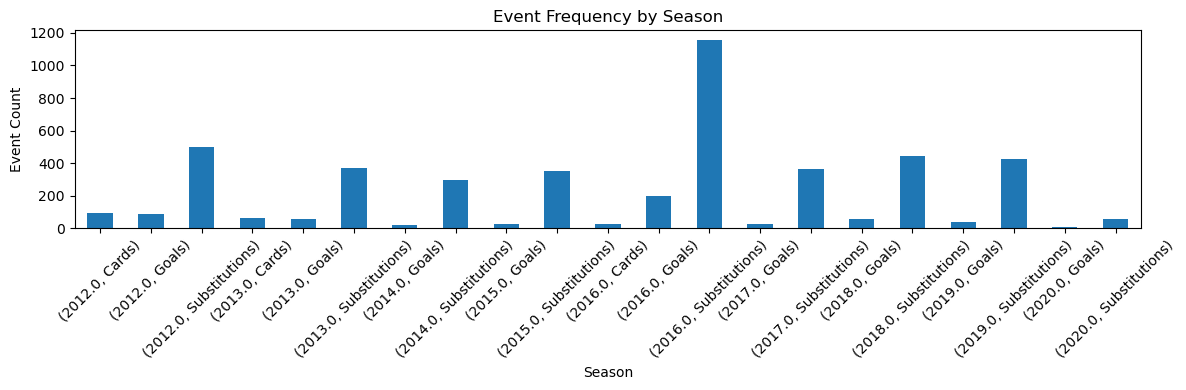

In [104]:
event_season.plot(kind='bar', stacked=True, figsize=(12, 4))
plt.title('Event Frequency by Season')
plt.ylabel('Event Count')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------
# 8. Competition Analysis

Question: 
- Which competition has the highest average attendance?
- Which competition has the highest goals?

## Which competition has the highest average attendance?

In [107]:
# Average attendance by competition
competition_attendance = data.groupby('competition_type')['attendance'].mean().sort_values(ascending=False)
print(competition_attendance)

competition_type
other                43190.333333
international_cup    30822.825843
domestic_league      29295.700584
domestic_cup         22995.438889
Name: attendance, dtype: float64


### Interpretation:
- This highlights competitions with the highest fan engagement.

## Which competition has the highest goals?

In [108]:
# Total goal by competition
competition_goal = data.groupby('competition_type')['goals'].sum().sort_values(ascending=False)
print(competition_goal)

competition_type
domestic_league      426.0
domestic_cup          83.0
international_cup     28.0
other                  4.0
Name: goals, dtype: float64


### Interpretation: 
- This highlights competitions with the highest goals that is on domestic league.

-------------------------------------------------------------------------------------------------------------------------------------------------------
# 9. Player Attributes and Demographics
Question: 
- What is the average height and weight of players by position?
- How does the player's position influence their goal-scoring performance and assists?


## What is the average height and weight of players by position?

In [111]:
# Average height and weight by position
player_attributes = data.groupby('position_x')['height_in_cm'].mean()
print(player_attributes)

position_x
Attacking Midfield    183.166667
Central Midfield      181.210526
Centre-Back           183.837054
Centre-Forward        185.466667
Defensive Midfield    178.214286
Goalkeeper            195.000000
Left Winger           175.750000
Left-Back             171.583333
Right Midfield        182.681818
Right Winger          177.636364
Right-Back            179.181818
Name: height_in_cm, dtype: float64


### Interpretation:  
- This helps analyze physical trends by position.

## How does the player's position influence their goal-scoring performance and assists?

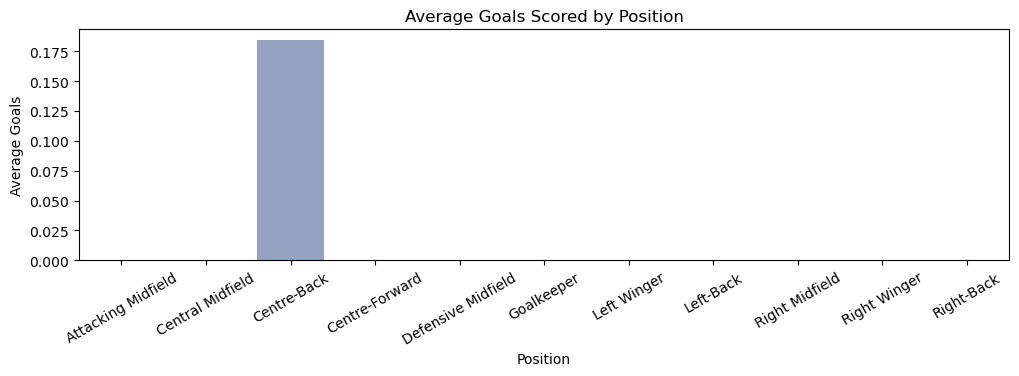

In [122]:
position_performance = data.groupby('position_x')['goals+assists'].mean().reset_index()

plt.figure(figsize=(12, 3))
sns.barplot(x='position_x', y='goals+assists', data=position_performance, palette='Set2')
plt.title('Average Goals Scored by Position')
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.xticks(rotation=30)
plt.show()

### Interpretation:
- This helps analyze physical trends by position.

-------------------------------------------------------------------------------------------------------------------------------------------------------
# 10. Contract Management
Question: 
- Which players have contracts expiring within the next year?
- How does the contract length correlate with player performance metrics (e.g., goals, assists)?

## Which players have contracts expiring within the next year?

In [123]:
# Players with contracts expiring in the next year
from datetime import datetime, timedelta
current_date = datetime.now()
one_year_later = current_date + timedelta(days=365)

data['contract_expiration_date'] = pd.to_datetime(data['contract_expiration_date'])
expiring_contracts = data[data['contract_expiration_date'].between(current_date, one_year_later)]
print(expiring_contracts[['player_name_x', 'contract_expiration_date']])

         player_name_x contract_expiration_date
1242  Timothy Chandler               2025-06-30
1243  Timothy Chandler               2025-06-30
1244  Timothy Chandler               2025-06-30
1245  Timothy Chandler               2025-06-30
1246  Timothy Chandler               2025-06-30
...                ...                      ...
4629    Fabian Johnson               2025-06-30
4636    Fabian Johnson               2025-06-30
4638    Fabian Johnson               2025-06-30
4645    Fabian Johnson               2025-06-30
4650    Fabian Johnson               2025-12-31

[866 rows x 2 columns]


### Interpretation:
- This helps clubs manage contract renewals effectively.

## How does the contract length correlate with player performance metrics (e.g., goals, assists)?

In [131]:
# Calculate the correlation between contract duration and performance metrics (goals, assists)
contract_performance_corr = data[['contract_expiration_date', 'goals+assists']].corr()
print(contract_performance_corr)

                          contract_expiration_date  goals+assists
contract_expiration_date                  1.000000       0.010871
goals+assists                             0.010871       1.000000


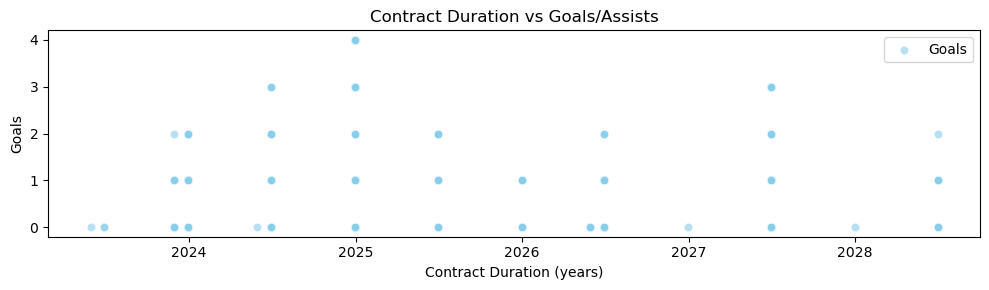

In [134]:
plt.figure(figsize=(10, 3))
sns.scatterplot(x='contract_expiration_date', y='goals+assists', data=data, color='skyblue', alpha=0.6, label='Goals')
plt.title('Contract Duration vs Goals/Assists')
plt.xlabel('Contract Duration (years)')
plt.ylabel('Goals')
plt.tight_layout()
plt.show()

### Interpretation:
- The scatter plot shows no clear relationship between contract duration and goals/assists, suggesting that contract length doesn't necessarily predict player performance.